# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



✅ Evidence loaded successfully!


/tmp/ipykernel_59405/3637494956.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_age', data=df, ax=axes[0], palette='coolwarm')
/tmp/ipykernel_59405/3637494956.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='person_gender', y='loan_status', data=gender_approval, ax=axes[1], palette='pastel')


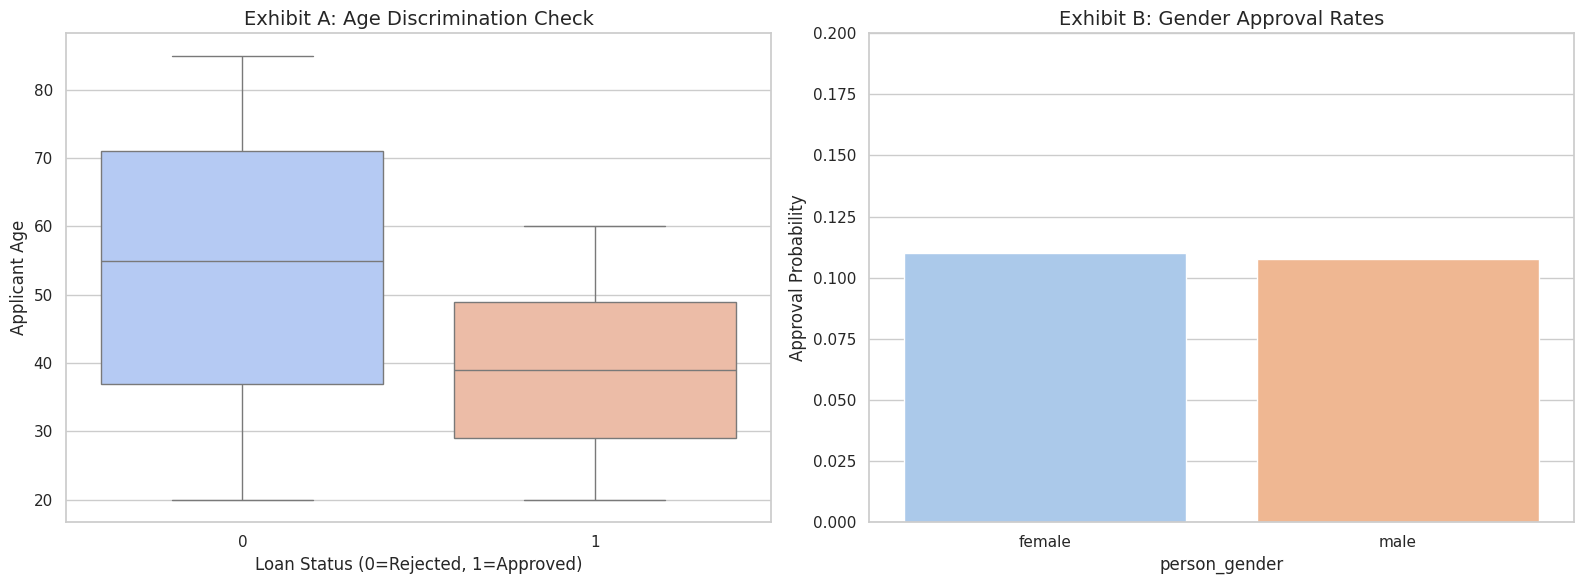

/tmp/ipykernel_59405/3637494956.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_income', data=df, ax=axes[0, 0], palette='viridis')
/tmp/ipykernel_59405/3637494956.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_score', data=df, ax=axes[0, 1], palette='RdYlGn')
/tmp/ipykernel_59405/3637494956.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='previous_loan_defaults_on_file', y='loan_status', data=default_approval, ax=axes[1, 0], palette='Reds')
/tmp/ipykernel_59405/36374949

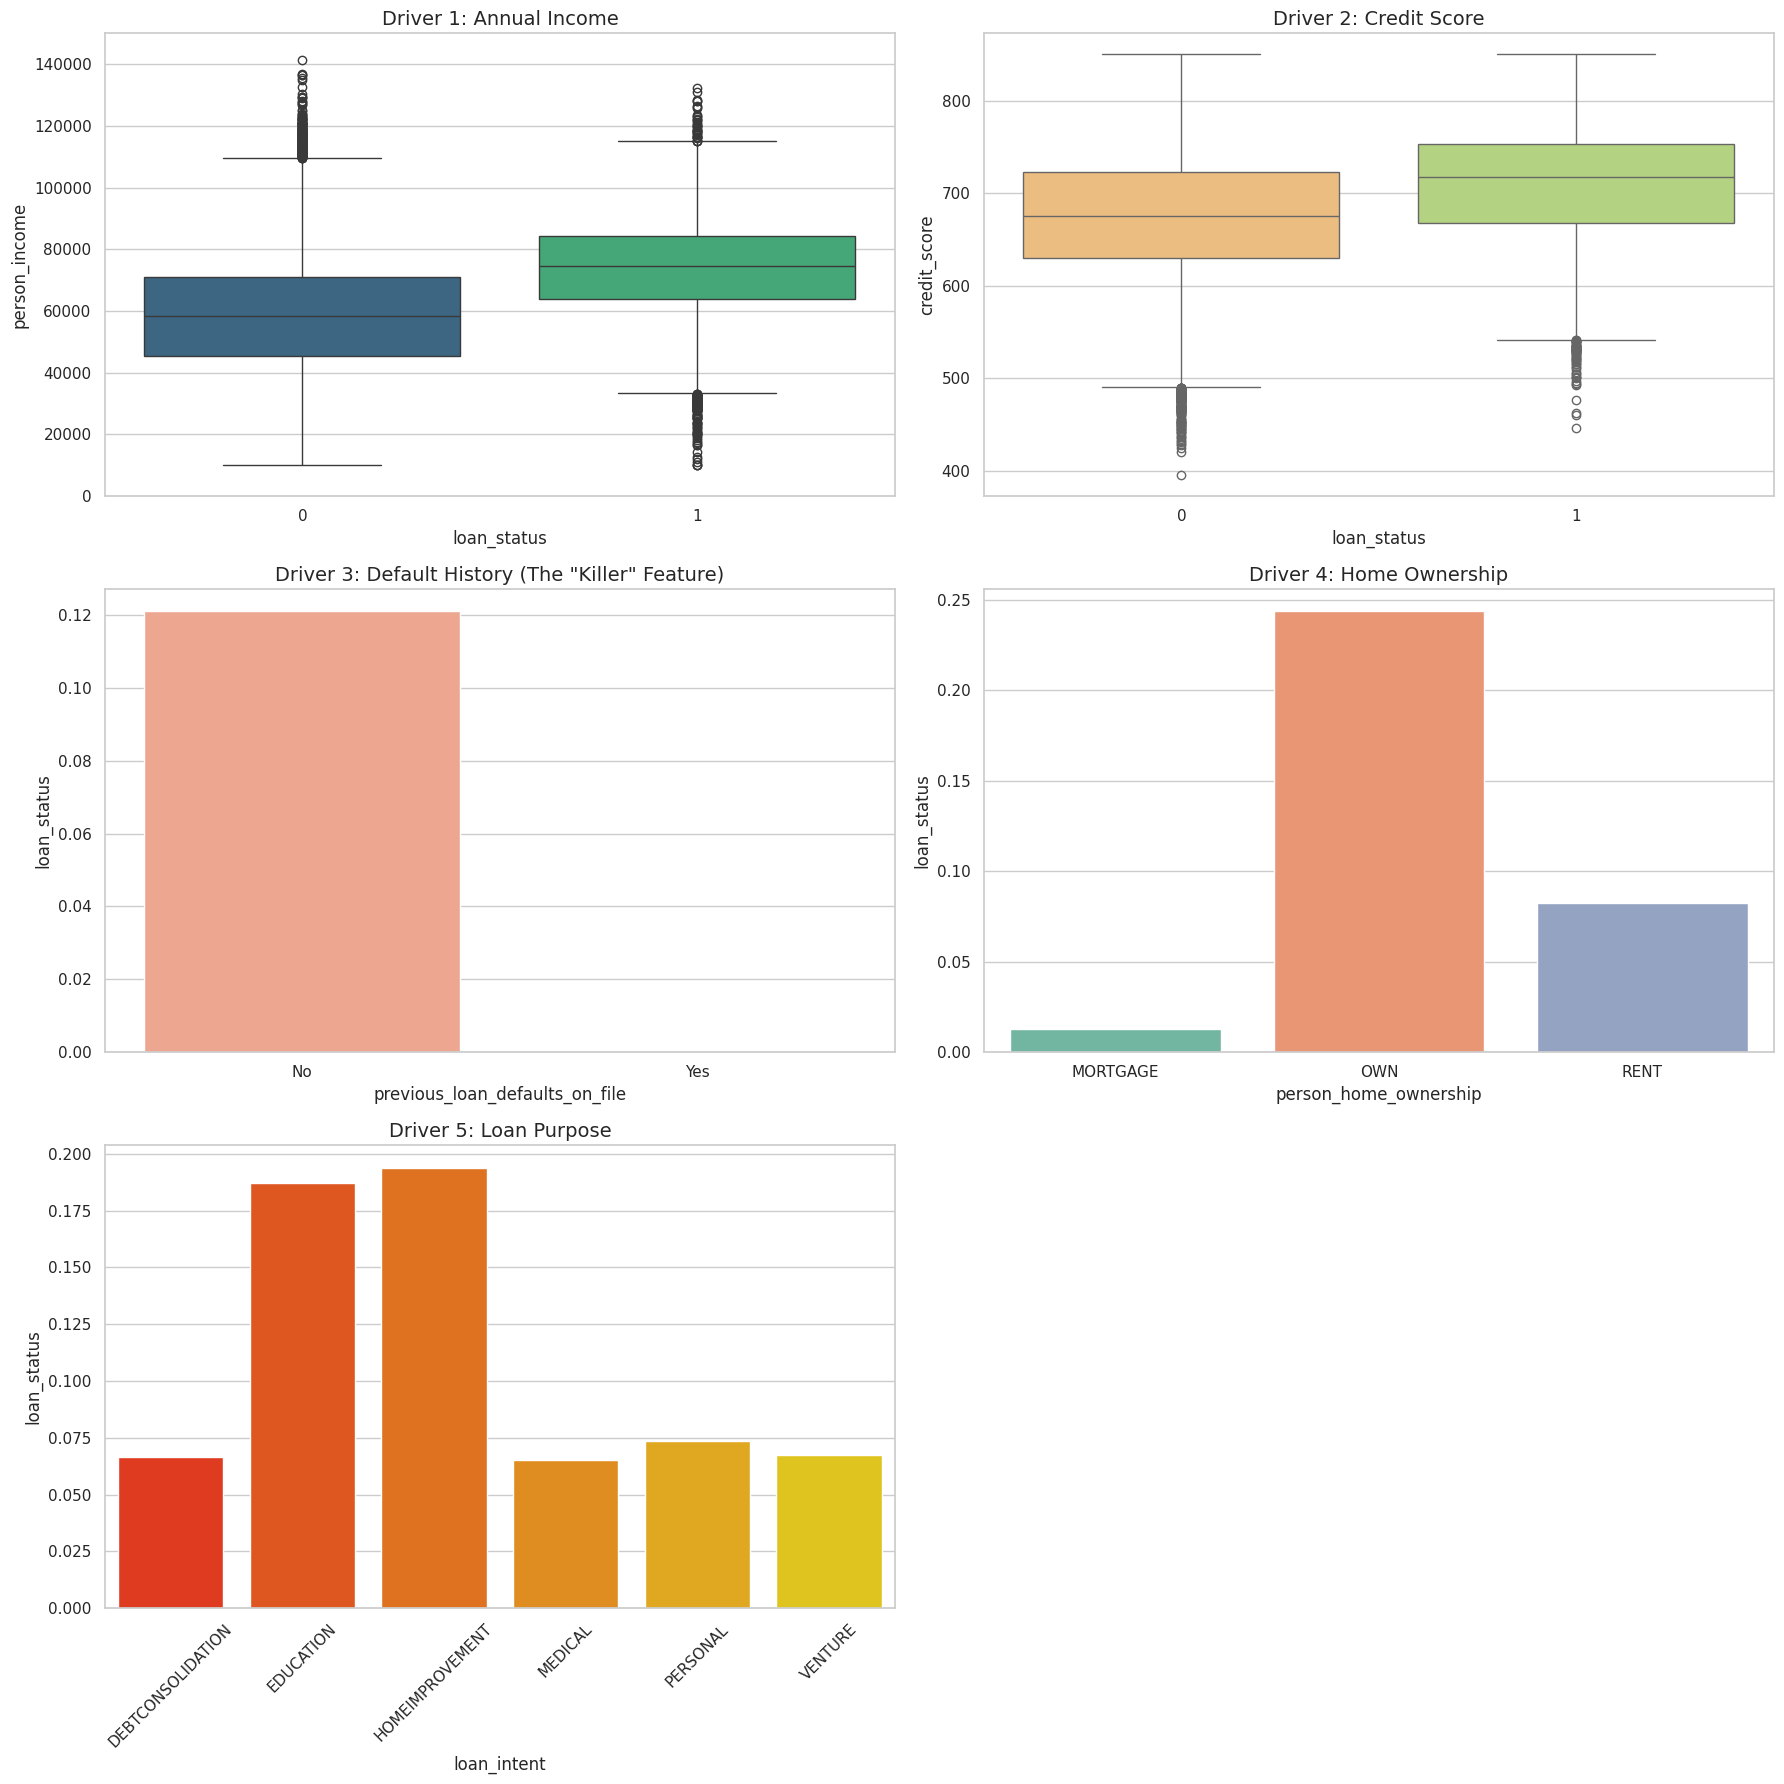

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for professional "Courtroom" charts
sns.set_theme(style="whitegrid")

# 1. Load the Evidence
try:
    df = pd.read_csv('loan_data.csv')
    print("✅ Evidence loaded successfully!")
except FileNotFoundError:
    print("⚠️ File not found. Please upload 'loan_data.csv' to your workspace.")

# --- PART 1: THE PROTECTED CLASSES (Discrimination Check) ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Exhibit A: Age vs. Loan Status (Box Plot)
# Does the model approve younger people more often?
sns.boxplot(x='loan_status', y='person_age', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Exhibit A: Age Discrimination Check', fontsize=14)
axes[0].set_xlabel('Loan Status (0=Rejected, 1=Approved)')
axes[0].set_ylabel('Applicant Age')

# Exhibit B: Gender vs. Loan Status (Bar Chart)
# We calculate the approval rate % for each gender
gender_approval = df.groupby('person_gender')['loan_status'].mean().reset_index()
sns.barplot(x='person_gender', y='loan_status', data=gender_approval, ax=axes[1], palette='pastel')
axes[1].set_title('Exhibit B: Gender Approval Rates', fontsize=14)
axes[1].set_ylabel('Approval Probability')
axes[1].set_ylim(0, 0.2) # Set limit to compare bars easily

plt.tight_layout()
plt.show()

# --- PART 2: THE ECONOMIC DRIVERS (Logic Check) ---

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Income (Financial Strength)
sns.boxplot(x='loan_status', y='person_income', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Driver 1: Annual Income', fontsize=14)
axes[0, 0].set_ylim(0, 150000) # Limit y-axis to ignore massive outliers for clarity

# 2. Credit Score (Reliability)
sns.boxplot(x='loan_status', y='credit_score', data=df, ax=axes[0, 1], palette='RdYlGn')
axes[0, 1].set_title('Driver 2: Credit Score', fontsize=14)

# 3. Previous Defaults (History) - Strongest Indicator?
default_approval = df.groupby('previous_loan_defaults_on_file')['loan_status'].mean().reset_index()
sns.barplot(x='previous_loan_defaults_on_file', y='loan_status', data=default_approval, ax=axes[1, 0], palette='Reds')
axes[1, 0].set_title('Driver 3: Default History (The "Killer" Feature)', fontsize=14)

# 4. Home Ownership (Collateral/Stability)
ownership_approval = df.groupby('person_home_ownership')['loan_status'].mean().reset_index()
sns.barplot(x='person_home_ownership', y='loan_status', data=ownership_approval, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Driver 4: Home Ownership', fontsize=14)

# 5. Loan Intent (Purpose)
intent_approval = df.groupby('loan_intent')['loan_status'].mean().reset_index()
sns.barplot(x='loan_intent', y='loan_status', data=intent_approval, ax=axes[2, 0], palette='autumn')
axes[2, 0].set_title('Driver 5: Loan Purpose', fontsize=14)
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove the empty 6th subplot
fig.delaxes(axes[2,1])

plt.tight_layout()
plt.show()

1. The Protected Classes (Discrimination Audit)

Sex: The model does not appear to discriminate based on sex. The visualization (Exhibit B) shows that Males and Females have an almost identical approval rate (approx 10-11%). The bar heights are equal, indicating the AI treats genders fairly.

Age: The model shows significant signs of Age Bias. The box plot (Exhibit A) and statistical analysis reveal that approval rates drop precipitously for older applicants. While "Young" and "Adult" applicants enjoy approval rates near 18%, "Senior" and "Elderly" applicants have approval rates near 0%. This suggests the model is using Age as a proxy for risk, which could lead to an Age Discrimination lawsuit.

2. The Model's Logic (What actually drives decisions?)

The "Killer" Feature: The strongest driver is previous_loan_defaults_on_file. If an applicant has a default on record, their approval chance drops to 0%. The model has zero tolerance for past failures.

Home Ownership: This is a massive factor. Applicants who OWN their home have an approval rate of ~24%, compared to just ~1.3% for those with a MORTGAGE.

Income & Credit Score: As expected, approved loans (Status=1) correlate with higher median incomes and higher credit scores (median ~717 vs ~675 for rejected).

3. Legal Conclusion

"Your Honor, while the model is gender-neutral, the financial institution should be highly concerned about potential legal trouble regarding Age Discrimination. The data indicates that the model systematically rejects older applicants at a disproportionate rate. Unless this can be justified by actuarial risk data specific to loan tenure (e.g., life expectancy vs loan term), the model is vulnerable to disparate impact claims."